In [1]:
"""
Content

Columns

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance


Inspiration
Can you accurately predict insurance costs?
"""

"\nContent\n\nColumns\n\n    age: age of primary beneficiary\n\n    sex: insurance contractor gender, female, male\n\n    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,\n    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9\n\n    children: Number of children covered by health insurance / Number of dependents\n\n    smoker: Smoking\n\n    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.\n\n    charges: Individual medical costs billed by health insurance\n\n\nInspiration\nCan you accurately predict insurance costs?\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("/home/ebilinux/Desktop/My_Files/Insurance_dataset/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analysis & Visualization

**Univariate Analysis**

Skewness: 1.515880
Kurtosis: 1.606299


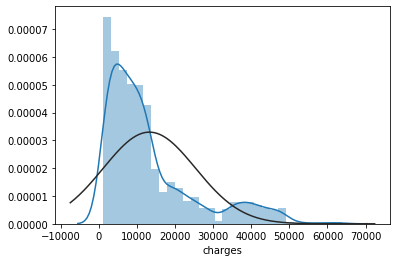

In [7]:
#Distribution of target variable
sns.distplot(df['charges'], hist=True, fit=stats.norm)

## Skewness and Kurtosis
print("Skewness: %f" % df['charges'].skew())
print("Kurtosis: %f" % df['charges'].kurt())



positive skewness

In [8]:
#encodind region, sex and smoker variables (which are nominal)  by LabelEncoder instead of OneHotEncoder

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['region'] = le.fit_transform(df['region'])  # Region
df['sex'] = le.fit_transform(df['sex'])  # Sex
df['smoker'] = le.fit_transform(df['smoker'])  # Smoker

In [9]:
df['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Bivariate Analysis**

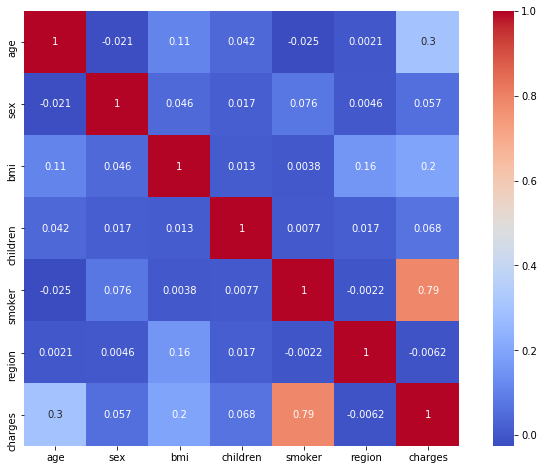

In [11]:
# Heat Map
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm', vmax=1.0,  ax=ax)

In [12]:
variables = df.corr()['charges'].sort_values(ascending=False)
variables

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

smoker variable has strong correlation to billing charges followed by age and bmi variables

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

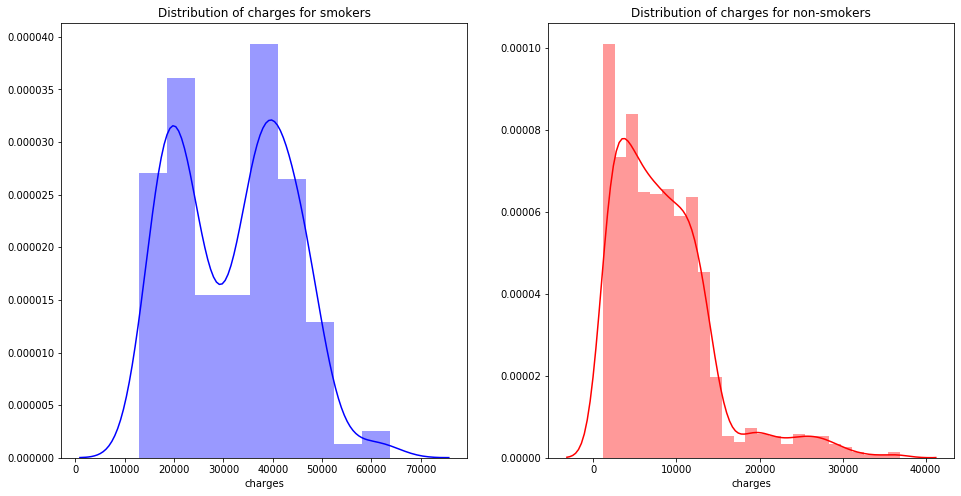

In [13]:
#charges ~ smoker

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1)
sns.distplot(df[(df['smoker'] == 1)]['charges'], color='blue', ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = fig.add_subplot(1,2,2)
sns.distplot(df[(df['smoker'] == 0)]['charges'], color='red', ax=ax)
ax.set_title('Distribution of charges for non-smokers')


smoker patients spend much more money compared to non-smokers

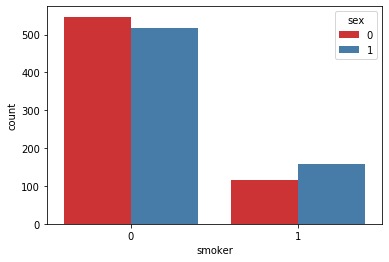

In [14]:
#relation between smoking and sex variables

#Women are coded as '1' and men as '0'
sns.countplot(x="smoker", hue = 'sex', palette="Set1", data=df)

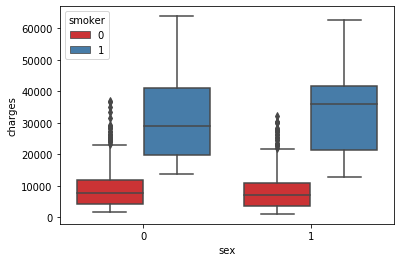

In [15]:
sns.boxplot(x="sex", y="charges", hue="smoker", data=df, palette = 'Set1')

ranges are different for men/women and smoker/non-smoker patients

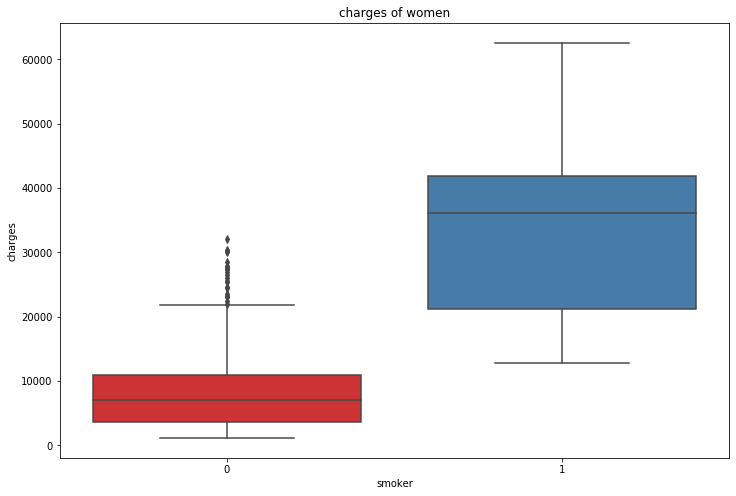

In [16]:
#  IQR and median for female patients
plt.figure(figsize=(12,8))
plt.title("charges of women")
sns.boxplot(x="smoker", y="charges", data=df[(df['sex'] == 1)], palette = 'Set1')

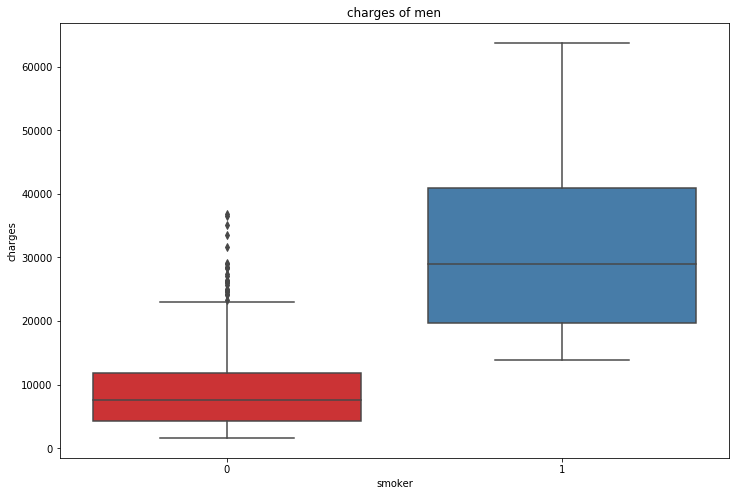

In [17]:
# IQR and median for male patients
plt.figure(figsize=(12,8))
plt.title("charges of men")
sns.boxplot(x="smoker", y="charges", data=df[(df['sex'] == 0)], palette = 'Set1')

non-smoker men and women have rather same median but median of smoker women is around 35000 and  less than 3000 for men smokers


analysing age variable

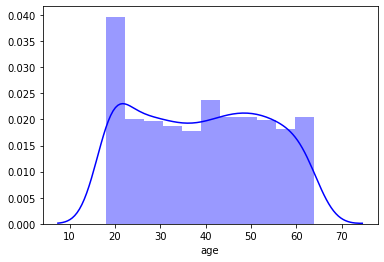

In [18]:
sns.distplot(df['age'], color = 'blue')

age at 18 has the peak value, so let's dig it further

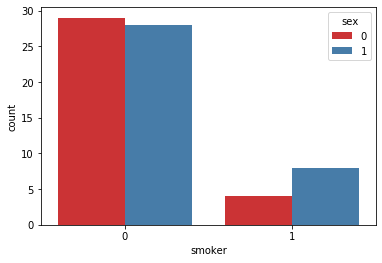

In [19]:
# only 18 year old patients
sns.countplot(x="smoker", hue = 'sex', palette="Set1", data=df[df['age']==18])

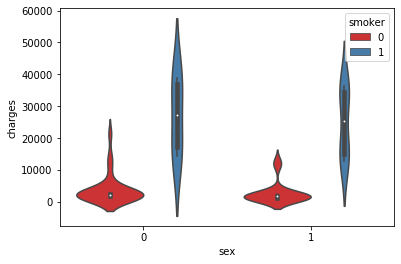

In [20]:
sns.violinplot(x="sex", y="charges", hue="smoker", data=df[df['age']==18], palette = 'Set1')

18 years old patients pay high billing charges (around 50000)

BMI

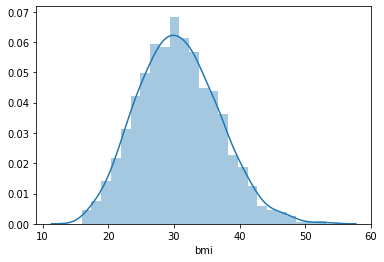

In [21]:
sns.distplot(df["bmi"])

bmi follows normal distribution
ideal bmi range for a person is 18.5-24.9
Lets's look at the distribution for both ideal and non-ideal range of bmi.

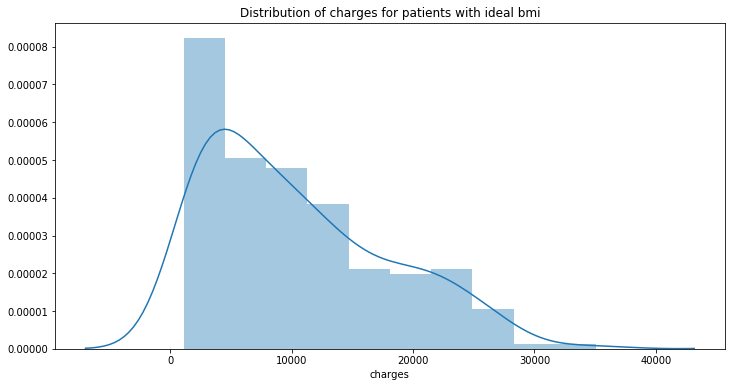

In [22]:
# ideal bmi
plt.figure(figsize=(12,6))
plt.title("Distribution of charges for patients with ideal bmi")
ax = sns.distplot(df[((df['bmi'] >= 18.5) & (df['bmi'] <= 24.9))]['charges'])

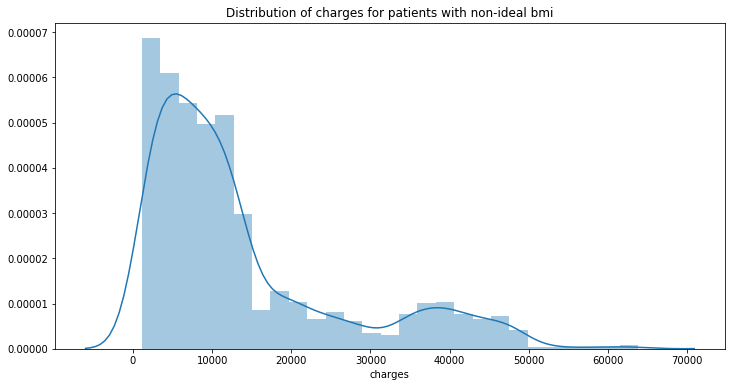

In [23]:
# non-ideal bmi
plt.figure(figsize=(12,6))
plt.title("Distribution of charges for patients with non-ideal bmi")
ax = sns.distplot(df[((df['bmi'] <= 18.5) | (df['bmi'] >= 24.9))]['charges'])

non-ideal bmi patients spend much more money

**relationship between top three correlated variables**

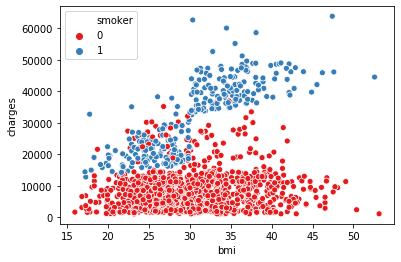

In [24]:
# charges, bmi, smoker
sns.scatterplot(y='charges', x='bmi', hue='smoker', palette='Set1', data=df)

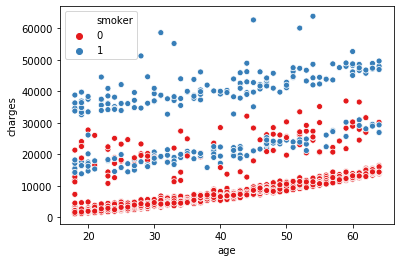

In [25]:
# charges, age, smoker
sns.scatterplot(y='charges', x='age', hue='smoker', palette='Set1', data=df)

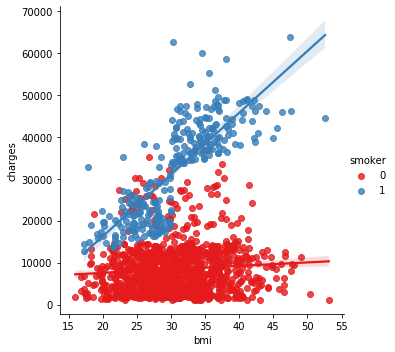

In [26]:
# Linera Regression of charges, bmi, smoker
sns.lmplot(x="bmi", y="charges", hue="smoker", palette = 'Set1', data=df)

bmi and charges have linear relationship for smokers with the intercept value of around 8000

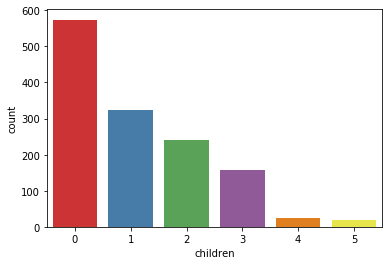

In [27]:
# Number of children patients have
sns.countplot(x="children", palette="Set1", data=df)

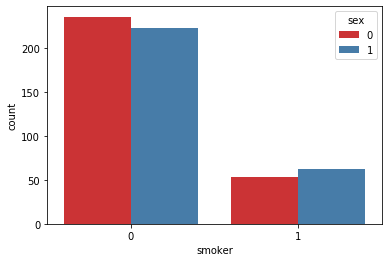

In [28]:
# smokers and non smokers, male and female having no child
sns.countplot(x="smoker", hue = 'sex', palette="Set1", data=df[df['children'] == 0])

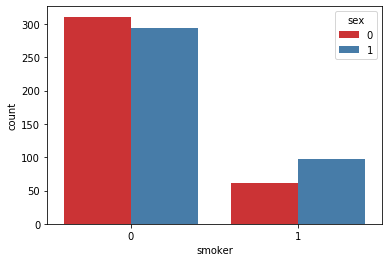

In [29]:
# smokers and non smokers, male and female with atleast 1 child
sns.countplot(x="smoker", hue = 'sex', palette="Set1", data=df[df['children'] > 0])

**Dealing with Missing Values**

In [30]:
# there isn't any missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Building Model**

In [31]:
dfmodel = pd.read_csv("/home/ebilinux/Desktop/My_Files/Insurance_dataset/insurance.csv")

In [32]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
# changing data type of bmi variable
dfmodel['bmi'] = dfmodel['bmi'].astype(np.int64)
dfmodel['charges'] = dfmodel['charges'].astype(np.int64)

In [34]:
# Dummifying data
dfmodel = pd.get_dummies(dfmodel)
dfmodel.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [35]:
# removing target variable
X = dfmodel.drop(['charges'], axis=1).values
y = dfmodel['charges'].values.reshape(-1,1)

In [36]:
# train_test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape

((1070, 11), (268, 11))

**Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
# Cross Validation
from sklearn import model_selection
cv_score = model_selection.cross_val_score(estimator=lm, X=X_train, y=y_train, cv = 10)

In [39]:
from sklearn import metrics


# R2 Score from train set
y_pred = lm.predict(X_train)
r2_train = metrics.r2_score(y_train, y_pred)

# R2 Score from test set
y_pred_test = lm.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred_test)

# RMSE score
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

# printing all stats
print("CV Score {} and standard deviation {}: ".format(cv_score.mean(), cv_score.std()))
print('R2_score (train): ', r2_train)
print('R2_score (test): ', r2_test)
print("RMSE: ", rmse)

CV Score 0.7246142246418825 and standard deviation 0.04808467466987239: 
R2_score (train):  0.7377762659817872
R2_score (test):  0.7990993105529942
RMSE:  5343.747491576613
